# 0.0. Imports

In [2]:
import numpy  as np
import pandas as pd
import scikitplot as skplt

import seaborn as sns

from matplotlib import pyplot as plt

from sklearn import model_selection as ms
from sklearn import linear_model    as lm
from sklearn import preprocessing   as pp
from sklearn import ensemble        as en
from sklearn import neighbors       as nh 

In [3]:
df_raw = pd.read_csv( '../data/raw/train.csv' )

# 1.0. Data Description

In [4]:
df1 = df_raw.copy()

## 1.1. Data Dimension

In [5]:
print( 'Number of Rows:{}'.format( df1.shape[0] ) )
print( 'Number of Columns:{}'.format( df1.shape[1] ) )

Number of Rows:381109
Number of Columns:12


In [6]:
cols_new = ['id', 'gender', 'age', 'driving_license', 'region_code', 'previously_insured', 'vehicle_age', 
            'vehicle_damage', 'annual_premium', 'policy_sales_channel', 'vintage', 'response']

# rename
df1.columns = cols_new

## 1.2. Data Types

In [7]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.3. Check NA

In [8]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.4. Data Descriptive

In [9]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'])

In [10]:
# Central Tendency - Mean, Median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


# 2.0. Feature Engineering

In [11]:
df2 = df1.copy()

In [12]:
cols_new = ['id', 'gender', 'age', 'driving_license', 'region_code', 'previously_insured', 'vehicle_age', 
            'vehicle_damage', 'annual_premium', 'policy_sales_channel', 'vintage', 'response']

# rename
df1.columns = cols_new

In [13]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [14]:
# Vehicle Damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x: 1 if x == 'Yes' else 0 )

# Vehicle Age
df2['vehicle_age'] =  df2['vehicle_age'].apply( lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' if x == '1-2 Year' else 'below_1_year' ) 

# 3.0. Data Filtering

In [15]:
df3 = df2.copy()

# 4.0. Exploratory Data Analysis

In [16]:
df4 = df3.copy()

## 4.1. Univariate Analysys

<AxesSubplot:xlabel='response', ylabel='age'>

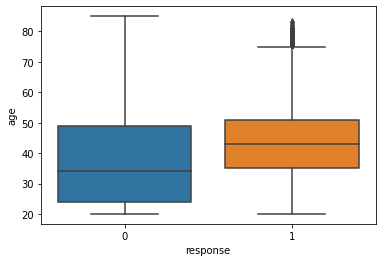

In [17]:
# gender
sns.boxplot( x='response', y='age', data=df4 )

<AxesSubplot:xlabel='age', ylabel='Count'>

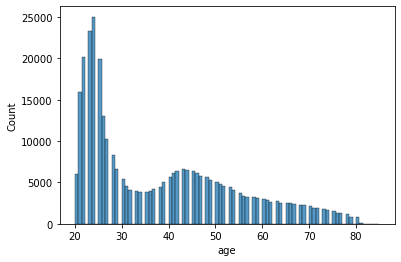

In [18]:
aux00 = df4.loc[df4['response'] == 0, 'age']
sns.histplot( aux00 )

<AxesSubplot:xlabel='age', ylabel='Count'>

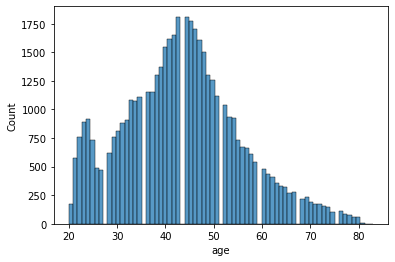

In [19]:
aux00 = df4.loc[df4['response'] == 1, 'age']
sns.histplot( aux00 )

<AxesSubplot:xlabel='response', ylabel='driving_license'>

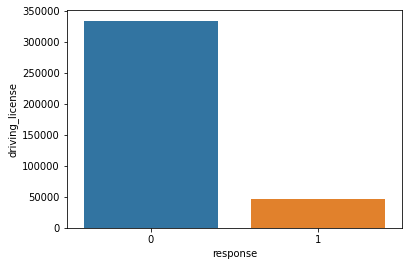

In [20]:
# driving license
aux = df4[['driving_license', 'response']].groupby( 'response' ).sum().reset_index()
sns.barplot( x='response', y='driving_license', data=aux )

In [21]:
pd.crosstab( df4['driving_license'], df4['response'] ).apply( lambda x: x / x.sum(), axis=1 )

response,0,1
driving_license,,
0,0.949507,0.050493
1,0.877283,0.122717


<AxesSubplot:xlabel='region_code', ylabel='id'>

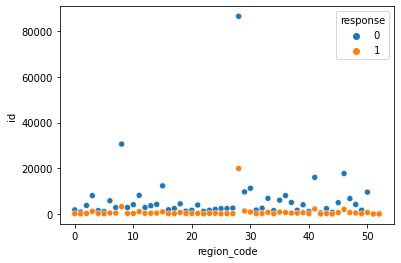

In [22]:
# region_code
aux0 = df4[['id', 'region_code', 'response']].groupby( ['region_code', 'response'] ).count().reset_index()
sns.scatterplot( x='region_code', y='id', hue='response', data=aux0 )

<AxesSubplot:xlabel='previously_insured', ylabel='id'>

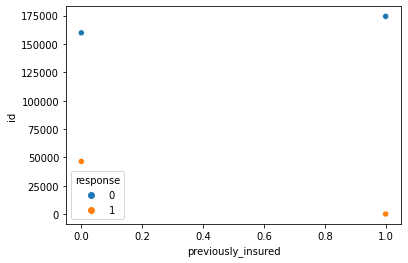

In [23]:
# previously_insured
aux0 = df4[['id', 'previously_insured', 'response']].groupby( ['previously_insured', 'response'] ).count().reset_index()
sns.scatterplot( x='previously_insured', y='id', hue='response', data=aux0 )

In [24]:
pd.crosstab( df4['previously_insured'], df4['response'] ).apply( lambda x: x / x.sum(), axis=1 )

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [25]:
# vehicle_age
df4[['vehicle_age', 'response']].value_counts( normalize=True ).reset_index()

,vehicle_age,response,0
0,between_1_2_year,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_year,1,0.091328
3,over_2_years,0,0.029663
4,below_1_year,1,0.018897
5,over_2_years,1,0.012338


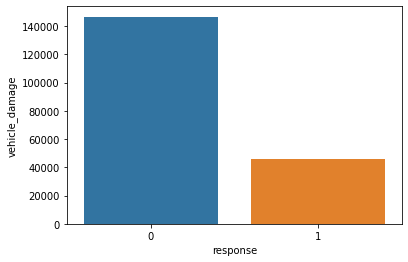

In [26]:
# vehicle_damage
aux = df4[['vehicle_damage', 'response']].groupby( 'response' ).sum().reset_index()
sns.barplot( x='response', y='vehicle_damage', data=aux );

In [27]:
# annual_premium

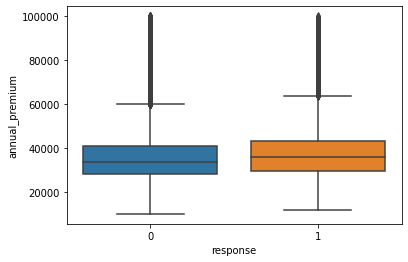

In [28]:
aux = df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 100000)]
sns.boxplot( x='response', y='annual_premium', data=aux );

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

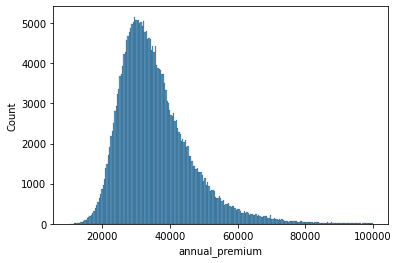

In [29]:
aux00 = aux.loc[aux['response'] == 0, 'annual_premium']
sns.histplot( aux00 )

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

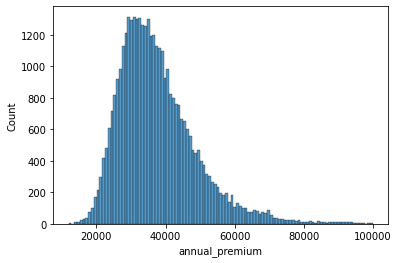

In [30]:
aux00 = aux.loc[aux['response'] == 1, 'annual_premium']
sns.histplot( aux00 )

In [31]:
# policy_sales_channel
#aux = pd.crosstab( df4['policy_sales_channel'], df4['response'] ).reset_index()
#aux.columns = ['policy_sales_channel', 'no', 'yes']
#aux.set_index( 'policy_sales_channel' );
aux = df4[['policy_sales_channel', 'response']].groupby( ['policy_sales_channel', 'response'] ).size().reset_index()
aux.columns = ['policy_sales_channel', 'response', 'number']
aux = aux[aux['number'] < 1000]
aux.head()

,policy_sales_channel,response,number
1,1.0,1,35
2,2.0,0,3
3,2.0,1,1
4,3.0,0,364
5,3.0,1,159


<AxesSubplot:xlabel='policy_sales_channel', ylabel='number'>

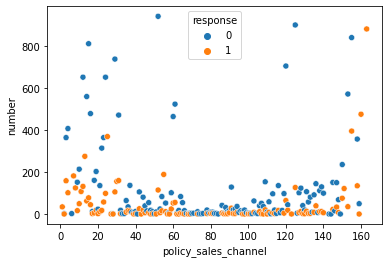

In [32]:
sns.scatterplot( x='policy_sales_channel', y='number', hue='response', data=aux )

KeyError: 'yes'

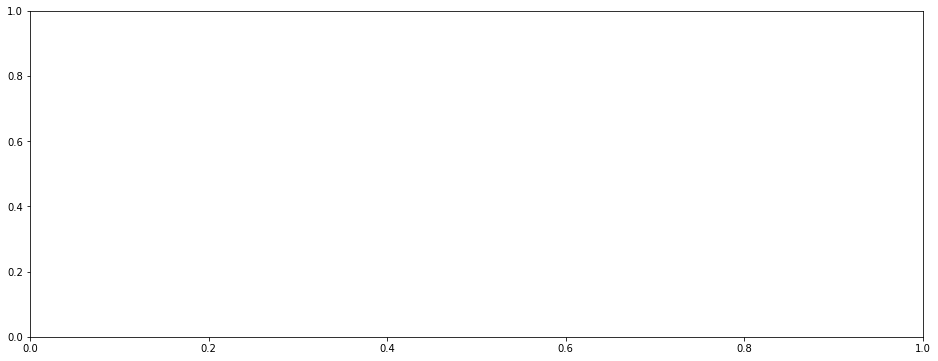

In [33]:
fig, ax = plt.subplots( 1, figsize=(16,6) )

x = np.arange( 0, len( aux.index ) )

# plot bars
plt.bar( x - 0.1, aux['yes'], color='red' )
plt.bar( x + 0.1, aux['no'], color='blue' )

In [ ]:
# vintage
aux0 = df4.loc[df4['response'] == 0, 'vintage']
sns.histplot( aux0 )

In [ ]:
# vintage
aux0 = df4.loc[df4['response'] == 1, 'vintage']
sns.histplot( aux0 )

# 5.0. Data Preparation

In [34]:
X = df4.drop( 'response', axis=1 )
y = df4['response'].copy()

x_train, x_val, y_train, y_val = ms.train_test_split( X, y, test_size=0.20 )

df5 = pd.concat( [x_train, y_train], axis=1 )

## 5.1. Standardization

In [35]:
ss = pp.StandardScaler()
# annual premium - Standard Scaler
df5['annual_premium'] = ss.fit_transform( df5[['annual_premium']].values )

## 5.2. Rescaling

In [36]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# Age - MinMax Scaler
df5['age'] = mms_age.fit_transform( df5[['age']].values )

# Vintage - MinMax Scaler
df5['vintage'] = mms_vintage.fit_transform( df5[['vintage']].values )

## 5.3. Transformation

In [37]:
# gender - One Hot Encoding / Target Encoding
target_encode_gender = df5.groupby( 'gender' )['response'].mean()
df5.loc[:, 'gender'] =  df5.loc[:, 'gender'].map( target_encode_gender )

# region_code - Frequency Encoding / Target Encoding
target_encode_region_code = df5.groupby( 'region_code' )['response'].mean()
df5.loc[:, 'region_code'] =  df5.loc[:, 'region_code'].map( target_encode_region_code )

# vehicle_age - One Hot Encoding / Frequency Encoding
df5 = pd.get_dummies( df5, prefix='vehicle_age', columns=['vehicle_age'] )

# policy_sales_channel - Frequency Encoding / Target Encoding
fe_policy_sales_channel = df5.groupby( 'policy_sales_channel' ).size() / len( df5 )
df5.loc[:, 'policy_sales_channel'] = df5.loc[:, 'policy_sales_channel'].map( fe_policy_sales_channel )

## 5.4. Validation

In [38]:
# gender
x_val.loc[:, 'gender'] =  x_val.loc[:, 'gender'].map( target_encode_gender )

# age
x_val.loc[:, 'age'] = mms_age.transform( x_val[['age']].values )

# region_code
x_val.loc[:, 'region_code'] = x_val.loc[:, 'region_code'].map( target_encode_region_code )

# vehicle_age
x_val = pd.get_dummies( x_val, prefix='vehicle_age', columns=['vehicle_age'] )

# annual_premium
x_val.loc[:, 'annual_premium'] = ss.transform( x_val[['annual_premium']].values )

# policy_sales_channel
x_val.loc[:, 'policy_sales_channel'] = x_val['policy_sales_channel'].map( fe_policy_sales_channel )

# vintage
x_val.loc[:, 'vintage'] = mms_vintage.transform( x_val[['vintage']].values )

# fillna
x_val = x_val.fillna( 0 )

/Users/meigarom.lopes/.pyenv/versions/3.8.0/envs/pa004/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/meigarom.lopes/.pyenv/versions/3.8.0/envs/pa004/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/Users/meigarom.lopes/.pyenv/versions/3.8.0/envs/pa004/lib/python3.8/site-packages/pan

# 6.0. Feature Selection

## 6.1. Boruta Algorithms

## 6.2. Tree-Based Model Feature Importance

In [39]:
# model definition
et_model = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1 )

# data preparation
x_train_n = df5.drop( ['id', 'response'], axis=1 )
y_train_n = y_train.values
et_model.fit( x_train_n, y_train_n )

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

feature ranking
                        feature  importance
0                       vintage    0.273567
0                annual_premium    0.244376
0                           age    0.162889
0                   region_code    0.108230
0                vehicle_damage    0.066724
0          policy_sales_channel    0.060147
0            previously_insured    0.057128
0      vehicle_age_below_1_year    0.013169
0  vehicle_age_between_1_2_year    0.006332
0                        gender    0.004671
0      vehicle_age_over_2_years    0.002279
0               driving_license    0.000487


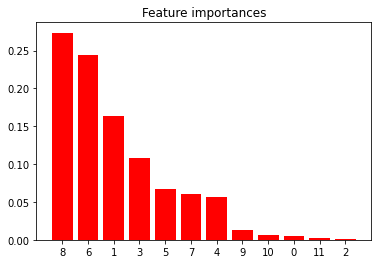

In [40]:
importances = et_model.feature_importances_
indices = np.argsort( importances )[::-1]

print( 'feature ranking')
df = pd.DataFrame()

for i, j in zip( x_train_n, et_model.feature_importances_ ):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df = pd.concat( [df, aux], axis=0 )
    
print( df.sort_values( 'importance', ascending=False ) )

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train_n.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

# 7.0. Machine Learning Model

In [41]:
cols_selected = ['annual_premium', 'vintage', 'age', 'region_code', 'vehicle_damage', 'previously_insured',
                 'policy_sales_channel']

In [42]:
x_train = df5[ cols_selected ]
x_val = x_val[ cols_selected ]

## 7.1. K-NN

In [43]:
# model definition
knn_model = nh.KNeighborsClassifier( n_neighbors=7 )

# model training
knn_model.fit( x_train, y_train )

# model predicion
yhat_knn = knn_model.predict_proba( x_val )

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

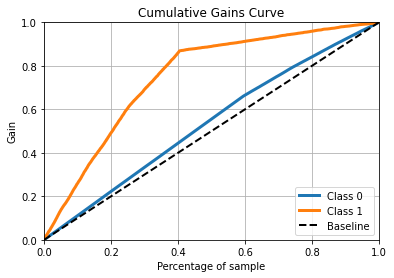

In [44]:
# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_knn )

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

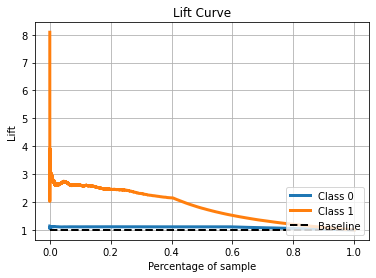

In [45]:
# Lift
skplt.metrics.plot_lift_curve( y_val, yhat_knn )

## 7.2. Logistic Regression

In [46]:
# model definition
lr_model = lm.LogisticRegression( random_state=42 )

# model training
lr_model.fit( x_train, y_train )

# model predicion
yhat_lr = lr_model.predict_proba( x_val )

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

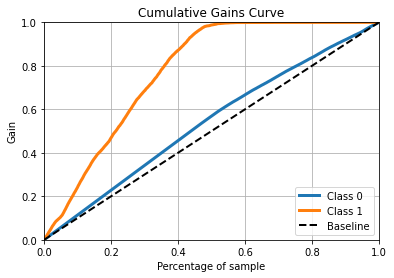

In [47]:
# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_lr )

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

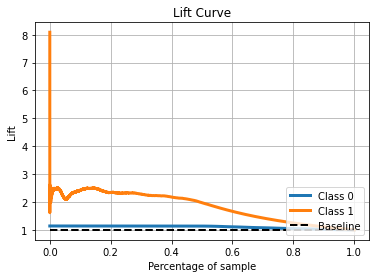

In [48]:
# Lift
skplt.metrics.plot_lift_curve( y_val, yhat_lr )

## 7.3. ExtraTrees

In [49]:
# model definition
et_model = en.ExtraTreesClassifier( n_estimators=1000, n_jobs=-1, random_state=42 )

# model training
et_model.fit( x_train, y_train )

# model predicion
yhat_et = et_model.predict_proba( x_val )

KeyboardInterrupt: 

In [ ]:
# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_et )

In [ ]:
# Lift
skplt.metrics.plot_lift_curve( y_val, yhat_et )